# sharing_bike

[项目连接](https://www.kaggle.com/c/bike-sharing-demand#description)

作者cu

1. 项目说明
   * 数据内容说明
   * 问题说明
   * 变量说明

2. 理解数据
   * 采集数据
   * 导入数据
   * 查看数据

3. 数据清洗
   * 数据预处理
   * 特征工程

4. 构建模型

5. 模型评估

6. 方案实施
   * 提交结果到Kaggle
   * 撰写报告

1.1自行车共享系统是一种租赁自行车的方法，注册会员、租车、还车都将通过城市中的站点网络自动完成，通过这个系统人们可以根据需要从一个地方租赁一辆自行车然后骑到自己的目的地归还。在这次比赛中，参与者需要结合历史天气数据下的使用模式，来预测D.C.华盛顿首都自行车共享项目的自行车租赁需求。

数据内容说明

比赛提供了跨越两年的每小时租赁数据，包含天气信息和日期信息，
训练集由每月前19天的数据组成，测试集是每月第二十天到当月底的数据。
1.2 提出问题
通过测试集中的天气等特征值预测会员租赁数量，临时租赁数量和总租赁数量。

1.3变量说明

datetime时间 - 年月日小时

season季节 - 1 = spring春天, 2 = summer夏天, 3 = fall秋天, 4 = winter冬天

holiday节假日 - 0：否，1：是

workingday工作日 - 该天既不是周末也不是假日（0：否，1：是）

weather天气 - 1:晴天，2:阴天 ，3:小雨或小雪 ，4:恶劣天气（大雨、冰雹、暴风雨或者大雪）

temp实际温度 - 摄氏度

atemp体感温度 - 摄氏度

humidity湿度 - 相对湿度

windspeed风速 - 风速

casual - 未注册用户租借数量

registered - 注册用户租借数量

count - 总租借数量

2.1采集数据

[下载项目网址](https://www.kaggle.com/c/bike-sharing-demand#description)

2.2导入数据

In [378]:
#忽略提示
import warnings
warnings.filterwarnings('ignore')
# 导入数据
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

2.3查看数据

In [379]:
#查看数据大小
print('训练集数据集大小：',train.shape,'测试数据集大小:',test.shape)

训练集数据集大小： (10886, 12) 测试数据集大小: (6493, 9)


In [380]:
#查看数据字段
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     64

In [381]:
#查看数据描述
print(train.describe(),test.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [382]:
#查看各类数据
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [383]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


[Text(0.5,0,'count'), Text(0.5,1,'Distribution of log(count)')]

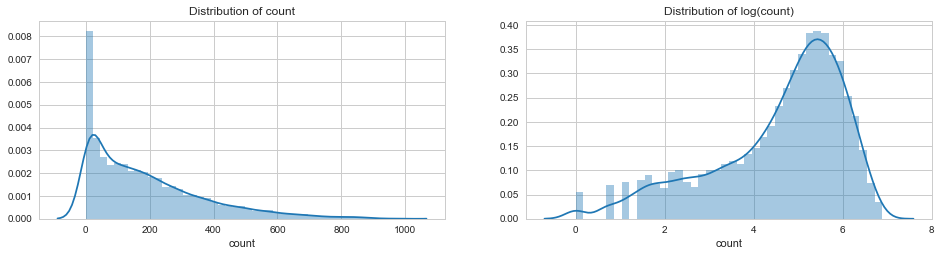

In [384]:
#查看要预测的count长什么样
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid' , palette='tab10')
import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
fig.set_size_inches(16,8)
sns.distplot(train['count'])
ax1.set(xlabel='count',title='Distribution of count')
ax2=fig.add_subplot(2,2,2)
sns.distplot(np.log(train['count']))
ax2.set(xlabel='count',title='Distribution of log(count)')

#发现经过train[count]d对数化之后，呈现正态分布,故使用对数化处理数据

In [385]:
train_y=np.log(train['count'])

In [386]:
datetimeloc=test['datetime']

总结：

1.训练数据集：

总共10886行，12列，各字段均无缺失值

除时间列数据为字符串外其余都为数值型数据：时间的数据格式需要转换为时间序列，进一步处理得到日期和星期的时间数据

2.测试数据集：

总共6493行，9列，各字段均无缺失值 测试数据集完整无需预处理

3，数据清洗

In [387]:
bike_data=pd.concat([train,test],axis=0)

3.1特征工程

数据类型分为3种，数值型，分类型，时间序列型

数值型：无需处理

分类型：使用onehot进行独热编码

时间序列型：时间的数据格式需要转换为时间序列，进一步处理得到日期和星期的时间数据

时间序列特征处理

对于租车量的需求分析，需要通过hour,date,weekday,month,year

In [388]:
#创建新的列
from datetime import datetime

In [389]:
bike_data['date']=bike_data['datetime'].map(lambda x:x.split(' ')[0])
bike_data['hour']=bike_data['datetime'].map(lambda x:x.split(' ')[1].split(':')[0]).astype(int)
bike_data['weekday']=bike_data['date'].map(lambda x:datetime.strptime(x,"%Y-%m-%d").isoweekday())
bike_data['month']=bike_data['date'].map(lambda x:x.split("-")[1]).astype(int)
bike_data['year']=bike_data['date'].map(lambda x:x.split("-")[0]).astype(int)
bike_data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,weekday,month,year
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011-01-01,0,6,1,2011
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011-01-01,1,6,1,2011
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2011-01-01,2,6,1,2011
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,2011-01-01,3,6,1,2011
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,2011-01-01,4,6,1,2011


分类型数据特征处理

In [390]:
dummies_season=pd.get_dummies(bike_data['season'],prefix='season')
dummies_year=pd.get_dummies(bike_data['year'],prefix='year')
dummies_month=pd.get_dummies(bike_data['month'],prefix='month')
dummies_weather=pd.get_dummies(bike_data['weather'],prefix='weather')
bike_data=pd.concat([bike_data,dummies_season,dummies_year,dummies_month,dummies_weather],axis=1)
train_data=bike_data
bike_data.drop(['datetime','season','year','month','weather'],axis=1,inplace=True)

In [391]:
bike_data.head()

,atemp,casual,count,holiday,humidity,registered,temp,windspeed,workingday,date,...,month_7,month_8,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4
0,14.395,3.0,16.0,0,81,13.0,9.84,0.0,0,2011-01-01,...,0,0,0,0,0,0,1,0,0,0
1,13.635,8.0,40.0,0,80,32.0,9.02,0.0,0,2011-01-01,...,0,0,0,0,0,0,1,0,0,0
2,13.635,5.0,32.0,0,80,27.0,9.02,0.0,0,2011-01-01,...,0,0,0,0,0,0,1,0,0,0
3,14.395,3.0,13.0,0,75,10.0,9.84,0.0,0,2011-01-01,...,0,0,0,0,0,0,1,0,0,0
4,14.395,0.0,1.0,0,75,1.0,9.84,0.0,0,2011-01-01,...,0,0,0,0,0,0,1,0,0,0


3.2特征向量选择

In [392]:
dfcorr=bike_data.corr()
dfcorr

,atemp,casual,count,holiday,humidity,registered,temp,windspeed,workingday,hour,...,month_7,month_8,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4
atemp,1.000000,0.462067,0.389784,-0.030973,-0.051918,0.314635,0.987672,-0.062336,0.054667,0.133750,...,0.406565,0.311514,0.180947,-0.003271,-0.189449,-0.265687,0.101504,-0.066425,-0.068346,-0.022088
casual,0.462067,1.000000,0.690414,0.043799,-0.348187,0.497250,0.467097,0.092276,-0.319111,0.302045,...,0.120093,0.086398,0.087452,0.035000,-0.049555,-0.120472,0.119728,-0.062184,-0.108853,-0.005760
count,0.389784,0.690414,1.000000,-0.005393,-0.317371,0.970948,0.394454,0.101369,0.011594,0.400601,...,0.073038,0.071023,0.070374,0.060271,0.003509,-0.026644,0.105246,-0.041329,-0.117519,-0.001459
holiday,-0.030973,0.043799,-0.005393,1.000000,-0.010588,-0.020956,-0.027340,0.003988,-0.252471,0.000479,...,0.006385,-0.052415,0.008320,0.007783,0.068314,0.004107,0.009167,0.004910,-0.023664,-0.002262
humidity,-0.051918,-0.348187,-0.317371,-0.010588,1.000000,-0.265458,-0.069881,-0.290105,0.015688,-0.276498,...,-0.046557,0.015783,0.135741,0.097405,-0.003398,0.061567,-0.383425,0.220758,0.309737,0.017443
registered,0.314635,0.497250,0.970948,-0.020956,-0.265458,1.000000,0.318571,0.091052,0.119460,0.380540,...,0.047872,0.056601,0.055473,0.060707,0.020600,0.007895,0.086621,-0.028997,-0.104936,0.000155
temp,0.987672,0.467097,0.394454,-0.027340,-0.069881,0.318571,1.000000,-0.023125,0.055390,0.137603,...,0.410784,0.334854,0.186359,-0.015371,-0.199251,-0.274142,0.101044,-0.069657,-0.062406,-0.021176
windspeed,-0.062336,0.092276,0.101369,0.003988,-0.290105,0.091052,-0.023125,1.000000,-0.011830,0.137252,...,-0.060129,-0.046374,-0.059492,-0.044849,-0.015544,-0.033764,0.005150,-0.049241,0.070018,0.001493
workingday,0.054667,-0.319111,0.011594,-0.252471,0.015688,0.119460,0.055390,-0.011830,1.000000,0.002285,...,-0.014090,0.043025,-0.010805,-0.008772,-0.010805,-0.013486,-0.041633,0.024960,0.032155,-0.000453
hour,0.133750,0.302045,0.400601,0.000479,-0.276498,0.380540,0.137603,0.137252,0.002285,1.000000,...,-0.002069,-0.001895,-0.001169,0.000020,-0.001229,-0.000889,0.036999,-0.050555,0.016963,0.000228


In [393]:
dfcorr['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year_2012     0.260403
season_3      0.136942
weather_1     0.105246
windspeed     0.101369
month_6       0.084233
season_2      0.075681
month_7       0.073038
month_8       0.071023
month_9       0.070374
month_10      0.060271
month_5       0.046551
season_4      0.023704
workingday    0.011594
month_11      0.003509
weather_4    -0.001459
weekday      -0.002283
holiday      -0.005393
month_4      -0.012354
month_12     -0.026644
weather_2    -0.041329
month_3      -0.071981
weather_3    -0.117519
month_2      -0.135275
month_1      -0.166108
season_1     -0.237704
year_2011    -0.260403
humidity     -0.317371
Name: count, dtype: float64

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5]),
 <a list of 33 Text yticklabel objects>)

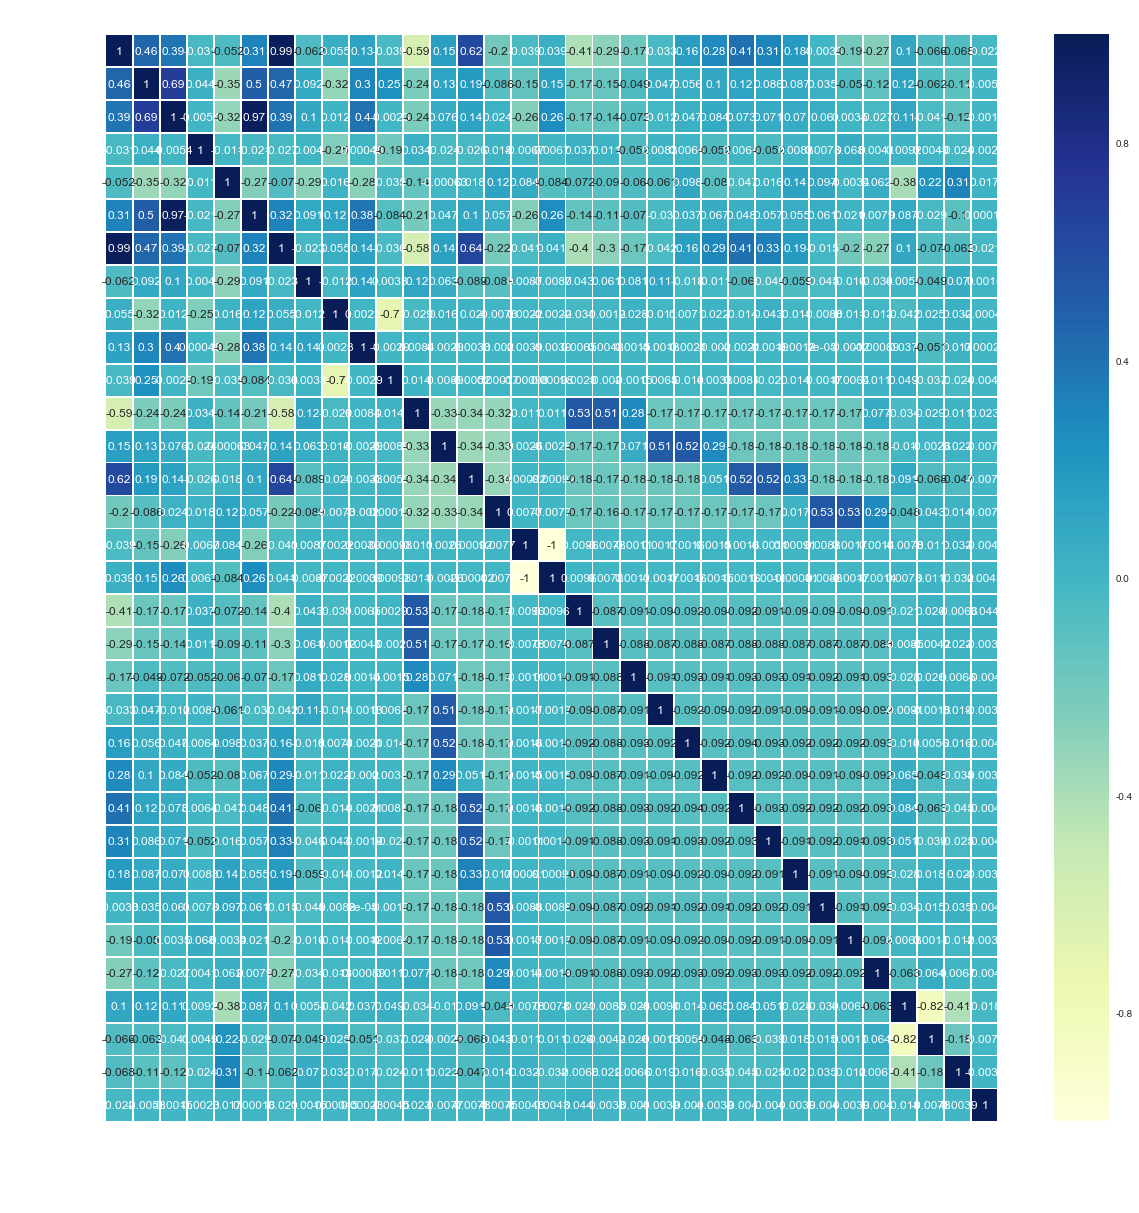

In [394]:
#可视化相关系数
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(1,1,1)
sns.heatmap(dfcorr,ax=ax1,vmax=1,square=False,annot=True,cmap='YlGnBu',linewidth=0.8)
plt.title('Heatmap on Correlation',fontsize=30,color='white')
plt.xticks(fontsize=18,color='white',rotation=45)
plt.yticks(fontsize=18,color='white')

In [ ]:
train_data.drop(['count','registered','casual','date'],axis=1,inplace=True)

In [396]:

train_x = train_data.iloc[:10886,]
testdata_x = train_data.iloc[10886:,]
train_x.shape

(10886, 30)

In [397]:
from  sklearn.cross_validation import train_test_split
 
train_x,test_x,train_y,test_y=train_test_split(train_x,train_y,train_size=.8)

#输出数据集大小
print('训练数据集特征：',train_x.shape,
     '测试数据集特征:',test_x.shape)
print('训练数据集标签：',train_y.shape,
     '测试数据集标签:',test_y.shape,
     '测试数据集标签:',testdata_x.shape)

训练数据集特征： (8708, 30) 测试数据集特征: (2178, 30)
训练数据集标签： (8708,) 测试数据集标签: (2178,) 测试数据集标签: (6493, 30)


In [398]:
# 5,选择模型，训练模型
from sklearn.ensemble import RandomForestRegressor
remodel=RandomForestRegressor(n_estimators=1000,random_state=42)
remodel.fit(train_x,train_y)
remodel.score(test_x,test_y)

0.94835212485270592

In [399]:
pretest=remodel.predict(testdata_x)
pred_x=pd.DataFrame({'datetime':datetimeloc,'count':[max(0,x) for x in np.exp(pretest)]})
pred_x.to_csv('bike_predict.csv',index=False)